In [333]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

from parser import parse_filename, natural_sort
import pandas as pd

In [334]:
ref_file = '/home/wanglei/hydrogen/analysis/refs/pnas2016.csv'
ref_df = pd.read_csv(ref_file, delimiter=r"\s+")
ref_df

,T,rs,etot,p
0,1200,1.34,-0.51592,269.0
1,1200,1.35,-0.51813,257.7
2,1200,1.36,-0.51980,243.1
3,1200,1.37,-0.52200,232.5
4,1200,1.38,-0.52560,234.1
5,1200,1.39,-0.52700,224.0
6,1200,1.40,-0.53010,218.5
7,1200,1.41,-0.53175,206.9
8,1200,1.42,-0.53353,198.5
9,1200,1.43,-0.53540,189.5


In [349]:
T, rs = 1200, 1.4
nicknames = ['ones-eloc']
files = []
for nickname in nicknames:
    files += glob("/data/wanglei/hydrogen/"+nickname+"/n_14*_dim_3_rs_%g*_T_%g_*depth_*spsize_*tpsize_*mcsteps_*lr_*/data.txt"%(rs, T))
files = list(filter(lambda f: os.path.getsize(f)!=0, files))
files = natural_sort(files)
len(files)

4

In [350]:
def cond(f):
    n, dim, rs, T, s, d, h1, h2, b, a, lr, decay, eta, maxnorm, Nf, clip = parse_filename(f)
    return lr >= 0.1 and b < 8192 and ('_ht_' not in f) and rs <1.46
files = list(filter(cond , files))
len(files)

3

/data/wanglei/hydrogen/ones-eloc/n_14_dim_3_rs_1.4_T_1200_steps_1_depth_3_spsize_32_tpsize_16_Nf_5_Gmax_15_kappa_10_mctherm_10_mcsteps_50_mcstddev_0.05_lr_0.1_decay_0.01_damping_0.001_norm_0.001_clip_4_bs_1024_devices_1_accsteps_1/data.txt
/data/wanglei/hydrogen/ones-eloc/n_14_dim_3_rs_1.42_T_1200_steps_1_depth_3_spsize_32_tpsize_16_Nf_5_Gmax_15_kappa_10_mctherm_10_mcsteps_50_mcstddev_0.05_lr_0.1_decay_0.01_damping_0.001_norm_0.001_clip_4_bs_1024_devices_1_accsteps_1/data.txt
/data/wanglei/hydrogen/ones-eloc/n_14_dim_3_rs_1.44_T_1200_steps_1_depth_3_spsize_32_tpsize_16_Nf_5_Gmax_15_kappa_10_mctherm_10_mcsteps_50_mcstddev_0.05_lr_0.1_decay_0.01_damping_0.001_norm_0.001_clip_4_bs_1024_devices_1_accsteps_1/data.txt


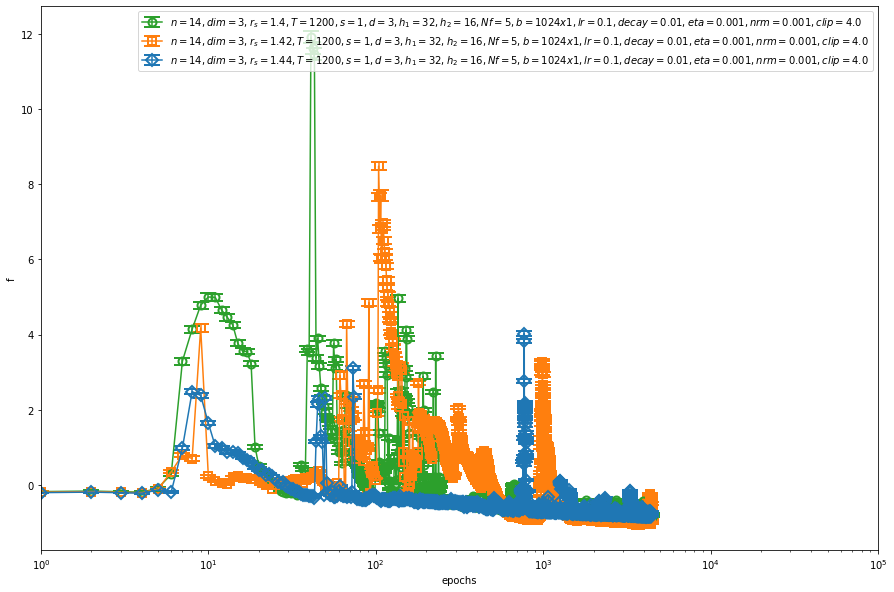

In [354]:
obs = 'f'

markers = ['o', 's', 'D', '*', 'x', '^', '<', 'h', '>', 'd', 'X', 'v', 'h', '1']
colors = ['C2', 'C1','C0', 'C3', 'C4', 'C6', 'C5', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13']

plt.figure(figsize=(15,10))
for f, marker, color in zip(files, markers, colors):
    n, dim, rs, T, s, d, h1, h2, b, a, lr, decay, eta, maxnorm, Nf, clip = parse_filename(f)
  
    print  (f)
    df = pd.read_csv(f, delimiter=r"\s+")
    label = r'$n=%s,dim=%s,r_s=%s,T=%g,s=%s,d=%s,h_1=%s,h_2=%s,Nf=%s,b=%sx%s,lr=%s,decay=%s,eta=%s,nrm=%s,clip=%s$'\
                %(n,dim,rs,T,s,d,h1,h2,Nf,b,a,lr,decay,eta,maxnorm,clip)
  
    if obs == 'vtot':
        y = df['vpp'].values + df['vep'].values + df['vee'].values
        yerr = np.sqrt(df['vpp_err'].values**2 + df['vep_err'].values**2 + df['vee_err'].values**2)       
    elif obs == 'etot':
        y = df['e'].values + df['vpp'].values
        yerr = np.sqrt(df['e_err'].values**2 + df['vpp_err'].values**2)
    elif obs in ['acc_s', 'acc_x']:
        y = df[obs].values
        yerr = np.zeros_like(y)
    else:
        y, yerr = df[obs].values, df[obs+'_err'].values
        
    plt.errorbar(df['epoch'].values, y, yerr=yerr,
                 marker=marker, color=color,markerfacecolor='none', 
                 markeredgewidth=2, ms=8, capsize=8, label=label)
 
    if obs in ['etot', 'p']:
        ref_value = ref_df.query('(T==%g) & (rs==%g)'%(T, rs))[obs].values[0]
        if obs == 'etot': ref_value *= 2 
        plt.axhline(y=ref_value, color='r')
        
        
    if obs == 'p': plt.ylim([100, 300])
    if obs == 'etot': plt.ylim([-2, 1])

plt.legend(loc='best')
plt.ylabel(obs)
plt.xlabel('epochs')
plt.xlim([1, 1e5])
plt.xscale('log') 

In [276]:
files = ['/data/wanglei/hydrogen/ones-eloc/n_14_dim_3_rs_1.4_T_1500_steps_1_depth_3_spsize_32_tpsize_16_Nf_5_Gmax_15_kappa_10_mctherm_10_mcsteps_50_mcstddev_0.05_lr_0.1_decay_0.01_damping_0.001_norm_0.001_clip_4_bs_1024_devices_1_accsteps_1/data.txt', '/data/wanglei/hydrogen/ones-eloc/n_14_dim_3_rs_1.4_T_1200_steps_1_depth_3_spsize_32_tpsize_16_Nf_5_Gmax_15_kappa_10_mctherm_10_mcsteps_50_mcstddev_0.05_lr_0.1_decay_0.01_damping_0.001_norm_0.001_clip_4_bs_1024_devices_1_accsteps_1/data.txt']